<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Kalman_Filters_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#!pip install pykalman
#!pip install yfinance

In [37]:
#Importing dependencies#
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import poly1d
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


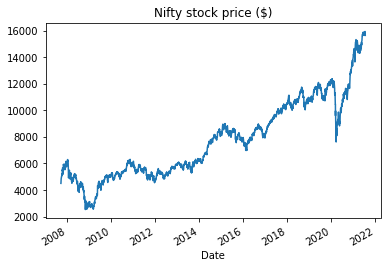

In [38]:
#ticker= yf.Ticker('TSLA')
nifty_df = yf.download('^NSEI',period='max')
nifty_df['Adj Close'].plot(title='Nifty stock price ($)')


In [39]:
nifty_df = yf.download('^nsei',start='2014-01-01',progress=False)


In [40]:
df = nifty_df[['Adj Close']]


Text(0.5, 0, 'Days')

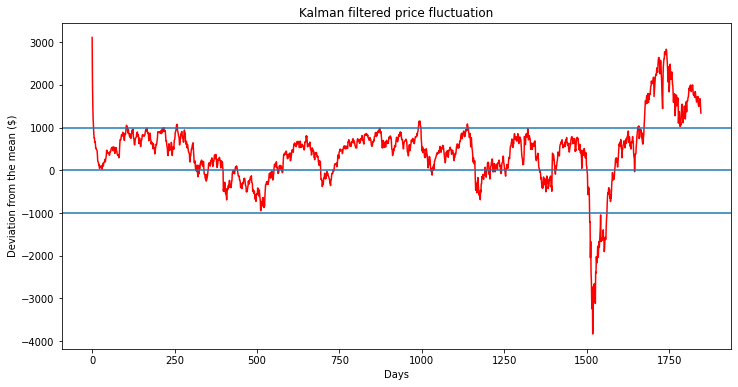

In [42]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean, cov = f.filter(df['Adj Close'].values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].values - mean, 'red', lw=1.5)
plt.axhline(y=0)
plt.axhline(y=1000)
plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation")
plt.ylabel("Deviation from the mean ($)")
plt.xlabel("Days")